# Aufgabe 2: Histogramme linearisieren
Damit der zur Verfügung stehende Grauwertbereich optimal ausgenutzt wird, kann das Histogramm eines Bildes linearisiert werden.
Dadurch wird der Kontrast verstärkt und das Bild qualitativ besser.
Bei der Linearisierung wird die Quantisierungskennlinie optimal an die in einem Bild auftretenden Helligkeitswerte angepasst, d.h. Bereiche mit seltenen Grauwerten werden im Histogramm enger "zusammengerückt", Bereiche mit häufigen Grauwerten werden gestreckt:

Um das Histogramm eines Bildes zu linearisieren, wird zunächst das kumulierte Histogramm
\begin{align}
 h_c(I) = \sum_{i=0}^I h(i).
\end{align}
berechnet, das zu jedem Grauwert $I$ die Häufigkeit von Intensitäten unterhalb dieses Grauwertes angibt.
Jedem Pixel im Bild mit dem Grauwert $I$ wird dann ein neuer Grauwert $I' = h_c(I)$ zugewiesen, wobei eine Skalierung der Werte von $h_c$ auf den Wertebereich der Grauwerte vorgenommen wird.

Schreiben Sie eine Python-Funktion, die die Histogrammlinearisierung auf Grauwertbildern durchführt!
Testen Sie diese auf den im Ordner `Bilder` bereitgestellten Beispielbildern!

## 0. Pfade, Pakete etc.

In [87]:
import glob
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

import PIL.Image
import numpy as np

In [88]:
image_filter = '../Bilder/*.jpg' # habe ich letzte mal schon hochgeladen.

## 1. Laden des Bildes

In [89]:
image_path = np.random.choice(glob.glob(image_filter))
image = np.asarray(PIL.Image.open(image_path).convert('L'))

## 2. Bestimmung des Histogrammes
Setzen Sie hier die Funktion `ex2_histogram` aus der vorherigen Übung ein:

In [90]:
def ex2_histogram(image:np.ndarray):
    histogram = [0] * 256
    image = image.flatten()

    for p in image:
        histogram[p] += 1

    return histogram

## 3. Bestimmung des kumulierten Histogramms
Definieren Sie nun eine Funktion, die für ein gegebenes Bild das kumulierte Histogramm zurückgibt. Dabei soll die o.g. Funktion `ex2_histogram` verwendet werden.

In [91]:
def ex2_cumulative_histogram(image):
    histogram = ex2_histogram(image)
    cumulative_histogram = [0] * 256

    s = 0
    for i,v in enumerate(histogram):
        s += v
        cumulative_histogram[i] = s
    return cumulative_histogram

Nun werden das Histogramm und das kumulative Histogramm von den Funktionen berechnet:

In [92]:
image_histogram = ex2_histogram(image)
image_cumulative_histogram = ex2_cumulative_histogram(image)

In [93]:
image_cumulative_histogram

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 3,
 3,
 5,
 6,
 10,
 12,
 14,
 20,
 28,
 36,
 44,
 63,
 73,
 98,
 129,
 159,
 210,
 290,
 463,
 916,
 2443,
 8674,
 34089,
 121979,
 344672,
 709867,
 1111261,
 1431118,
 1661450,
 1834581,
 1975170,
 2095921,
 2203356,
 2300139,
 2390324,
 2478515,
 2569753,
 2667340,
 2774840,
 2889163,
 3006352,
 3122064,
 3232037,
 3333945,
 3426388,
 3510673,
 3585846,
 3653519,
 3714774,
 3769504,
 3819271,
 3864092,
 3905716,
 3944440,
 3981601,
 4018042,
 4053870,
 4090620,
 4128371,
 4166717,
 4205960,
 4246180,
 4287246,
 4329279,
 4372785,
 4417958,
 4464616,
 4513476,
 4564475,
 4617083,
 4671129,
 4726354,
 4782016,
 4837696,
 4892648,
 4946817,
 4999570,
 5050720,
 5099689,
 5146644,
 5190979,
 5233122,
 5272807,
 5309711,
 5344161,
 5376509,
 5406247,
 5433505,
 5458450,
 5481243,
 5501765,
 5520405,
 5537145,
 5552370,
 5566225,
 5578499,
 5589569,
 5599448,
 5608322,
 5616348,
 5623689,
 563016

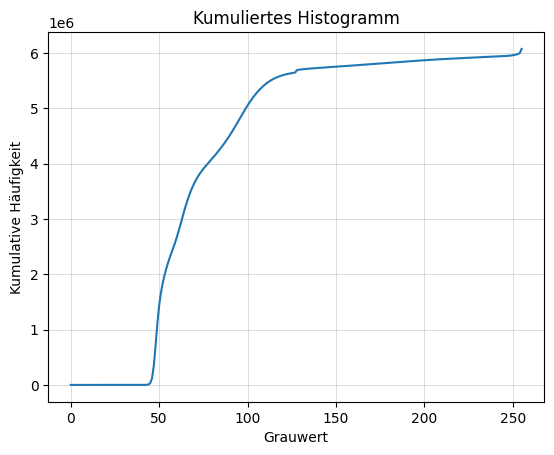

In [94]:
plt.plot(image_cumulative_histogram, color='tab:blue')
plt.title('Kumuliertes Histogramm')
plt.xlabel('Grauwert')
plt.ylabel('Kumulative Häufigkeit')
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.6)
plt.show()

## 4. Histogrammlinearisierung
Im Folgenden soll eine Funktion definiert werden, die ein gegebenes Bild und ein kumulatives Histogramm verwendet, um die Histogrammlinearisierung auf dem Bild durchzuführen. Das linearisierte Bild soll zurückgegeben werden, ohne das Original zu verändern.

Initialisieren Sie zunächst ein leeres Bild mit Hilfe der Funktion [`zeros_like`](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) aus dem Paket `numpy`. Wenden Sie die Histogrammlinearisierung dann Pixel für Pixel an.

In [95]:
def ex2_histogram_linearization(image, cumulative_histogram):
    linearized_image = np.zeros_like(image, dtype=np.uint8)

    total_pixels = image.size

    cdf = np.asarray(cumulative_histogram, dtype=np.float64)
    cdf_positive = cdf[cdf > 0]
    cdf_min = cdf_positive.min() if cdf_positive.size else 0.0
    denominator = max(total_pixels - cdf_min, 1)

    mapped_values = np.round((cdf - cdf_min) / denominator * 255.0)
    mapped_values = np.clip(mapped_values, 0, 255).astype(np.uint8)

    linearized_image[:] = mapped_values[image]
    return linearized_image

Die Funktion wird nun verwendet, um das Bild zu linearisieren:

In [96]:
linearized_image = ex2_histogram_linearization(image, image_cumulative_histogram)
linearized_image_cumulative_histogram = ex2_cumulative_histogram(linearized_image)

## 5. Darstellung
Um die Wirksamkeit der Histogrammlinearisierung zu überprüfen, stellen Sie zunächst die kumulativen Histogramme von `image` und `linearized_image` nebeneinander dar:

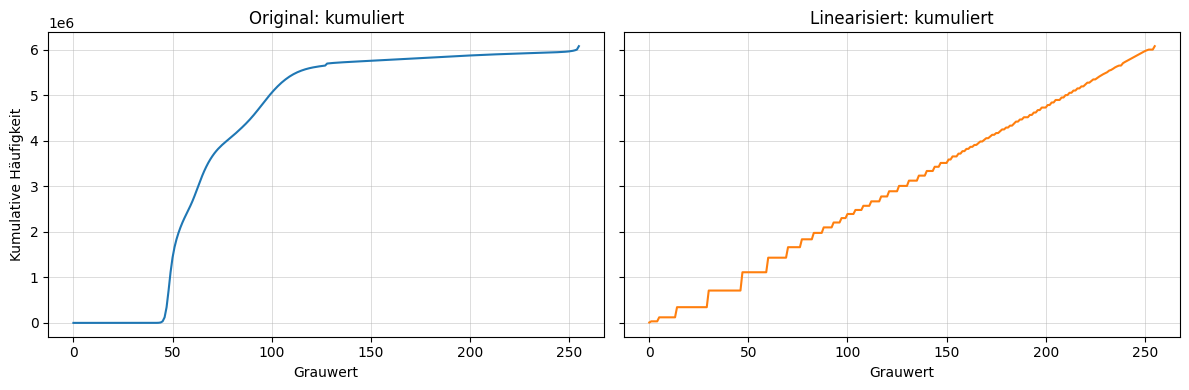

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axes[0].plot(image_cumulative_histogram, color='tab:blue')
axes[0].set_title('Original: kumuliert')
axes[0].set_xlabel('Grauwert')
axes[0].set_ylabel('Kumulative Häufigkeit')
axes[0].grid(True, linestyle='-', linewidth=0.5, alpha=0.6)

axes[1].plot(linearized_image_cumulative_histogram, color='tab:orange')
axes[1].set_title('Linearisiert: kumuliert')
axes[1].set_xlabel('Grauwert')
axes[1].grid(True, linestyle='-', linewidth=0.5, alpha=0.6)

fig.tight_layout()
plt.show()

Vergleichen Sie nun die beiden Bilder, indem Sie sie nebeneinander anzeigen.

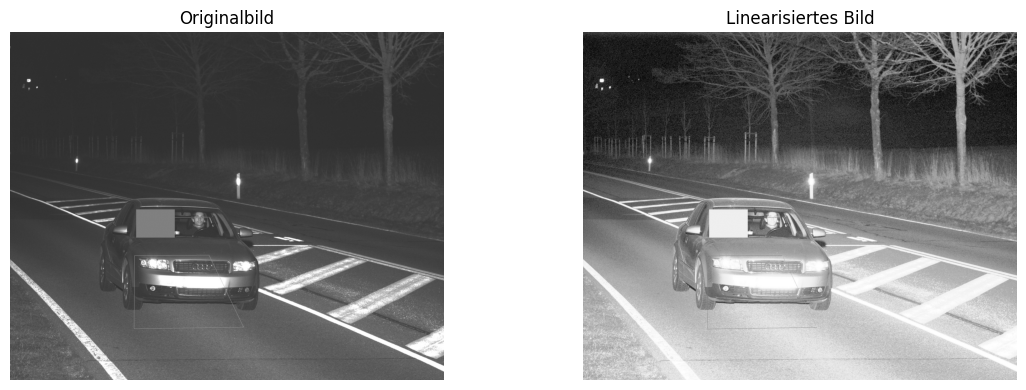

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Originalbild')
axes[0].axis('off')

axes[1].imshow(linearized_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Linearisiertes Bild')
axes[1].axis('off')

fig.tight_layout()
plt.show()